In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
!dir inputs

 Volume in drive D has no label.
 Volume Serial Number is F6A2-5568

 Directory of D:\PythonTraining\Trading\other_fx\inputs

2021/04/25  17:05    <DIR>          .
2021/04/25  17:05    <DIR>          ..
2021/04/18  16:22         2,573,622 EURGBP_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,576,106 EURJPY_M10_202003020000_202104162350.csv
2021/04/18  16:21         2,571,608 EURUSD_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,585,572 GBPJPY_M10_202003020000_202104162350.csv
2021/04/18  16:22         2,578,380 GBPUSD_M10_202003020000_202104162350.csv
2021/04/25  17:05         1,753,986 GBPUSD_M15.csv
2021/04/18  15:32    <DIR>          m1
2021/04/18  16:23    <DIR>          m5
2021/04/25  16:34           677,304 NI225_M15.csv
2021/04/19  21:36         2,577,705 USDJPY_M10.csv
2021/04/18  16:22         2,571,975 USDJPY_M10_202003020000_202104162350.csv
2021/04/24  12:46         1,733,783 USDJPY_M15.csv
              10 File(s)     22,200,041 bytes
        

In [3]:
data = pd.read_csv('inputs/USDJPY_M15.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close', 'tickvol', 'vol', 'spread'), skiprows=1)
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data

,date,time,open,high,low,close,tickvol,vol,spread,datetime
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00


In [4]:
# ni225 = pd.read_csv('inputs/NI225_M15.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close', 'tickvol', 'vol', 'spread'), skiprows=1)
# ni225['datetime'] = pd.to_datetime(ni225['date']  + ' ' + ni225['time'])
# ni225

In [5]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,date,time,open,high,low,close,tickvol,vol,spread,datetime
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00


In [6]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,date,time,open,high,low,close,tickvol,vol,spread,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,2020.03.02,00:00:00,107.513,107.754,107.502,107.646,428,0,3,2020-03-02 00:00:00,2,3,2020,0,62,0,0
1,2020.03.02,00:15:00,107.646,107.769,107.629,107.717,399,0,4,2020-03-02 00:15:00,2,3,2020,0,62,0,15
2,2020.03.02,00:30:00,107.717,107.731,107.635,107.640,180,0,11,2020-03-02 00:30:00,2,3,2020,0,62,0,30
3,2020.03.02,00:45:00,107.641,107.646,107.362,107.375,357,0,8,2020-03-02 00:45:00,2,3,2020,0,62,0,45
4,2020.03.02,01:00:00,107.375,107.591,107.361,107.498,1224,0,3,2020-03-02 01:00:00,2,3,2020,0,62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00,23,4,2021,4,113,22,45
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00,23,4,2021,4,113,23,0
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00,23,4,2021,4,113,23,15
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00,23,4,2021,4,113,23,30


In [7]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,0,0
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,0,15
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,0,30
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,0,45
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,23,30


In [8]:
dataset['y'] = dataset['high'].shift(-1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
dataset

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,0,0,107.769
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,0,15,107.731
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,0,30,107.646
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,0,45,107.591
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,1,0,107.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,23,30,107.903


In [10]:
# for i in range(1, 13):
#     dataset['shift%s'%i] = dataset['open'].shift(i)

dataset['sma5'] = dataset['open'].rolling(5).mean()
dataset['sma15'] = dataset['open'].rolling(15).mean()
# dataset['sma50'] = dataset['open'].rolling(50).mean()
# dataset['sma100'] = dataset['open'].rolling(100).mean()
dataset

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y,sma5,sma15
0,107.513,107.754,107.502,107.646,428,2,3,2020,0,62,0,0,107.769,NaN,NaN
1,107.646,107.769,107.629,107.717,399,2,3,2020,0,62,0,15,107.731,NaN,NaN
2,107.717,107.731,107.635,107.640,180,2,3,2020,0,62,0,30,107.646,NaN,NaN
3,107.641,107.646,107.362,107.375,357,2,3,2020,0,62,0,45,107.591,NaN,NaN
4,107.375,107.591,107.361,107.498,1224,2,3,2020,0,62,1,0,107.700,107.5784,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908,107.9028,107.932667
28338,107.886,107.908,107.884,107.888,104,23,4,2021,4,113,23,30,107.903,107.8934,107.927200


In [11]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y,sma5,sma15
100,108.263,108.364,108.236,108.237,1002,3,3,2020,1,63,1,0,108.273,108.3036,108.172733
101,108.236,108.273,108.206,108.232,691,3,3,2020,1,63,1,15,108.320,108.2836,108.195667
102,108.232,108.320,108.216,108.315,1031,3,3,2020,1,63,1,30,108.532,108.2676,108.223600
103,108.315,108.532,108.315,108.522,1231,3,3,2020,1,63,1,45,108.522,108.2702,108.254533
104,108.522,108.522,108.350,108.368,1326,3,3,2020,1,63,2,0,108.431,108.3136,108.291600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,22,30,107.895,107.9260,107.944867
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908,107.9028,107.932667


In [12]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
tickvol        False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y              False
sma5           False
sma15          False
dtype: bool

In [13]:
X = dataset.drop(['y'], axis=1)
y =  dataset['y']

In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [16]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [17]:
# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'rmse'},
        'num_leaves':78,
        'drop_rate':0.05,
        'learning_rate':0.005,
        'seed':0,
        'verbose':0,
        'device': 'cpu',
        'max_depth': -1, 
        'random_state': 0
}

In [18]:
evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] seed is set=0, random_state=0 will be ignored. Current value: seed=0
Training until validation scores don't improve for 1000 rounds
[100]	Train's rmse: 0.793413	Valid's rmse: 0.983638
[200]	Train's rmse: 0.482544	Valid's rmse: 0.603146
[300]	Train's rmse: 0.295111	Valid's rmse: 0.370816
[400]	Train's rmse: 0.182943	Valid's rmse: 0.230062
[500]	Train's rmse: 0.11706	Valid's rmse: 0.145426
[600]	Train's rmse: 0.079837	Valid's rmse: 0.0952076
[700]	Train's rmse: 0.0601736	Valid's rmse: 0.0663114
[800]	Train's rmse: 0.0505616	Valid's rmse: 0.0507448
[900]	Train's rmse

In [19]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

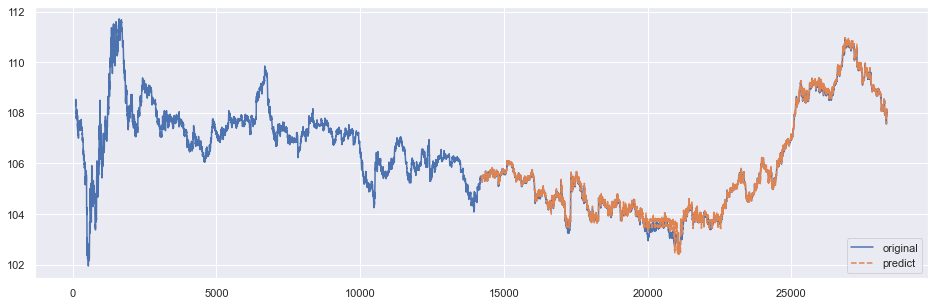

In [20]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

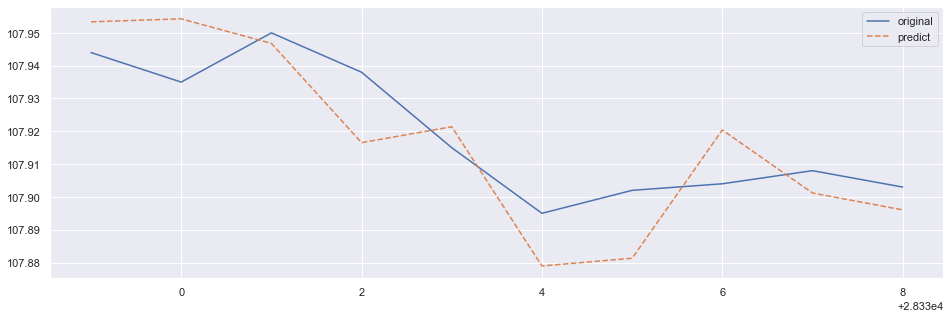

In [21]:
plt.figure(figsize=(16,5))
plt.plot(y[-10:], label='original')
plt.plot(y_[-10:], '--', label='predict')
plt.legend()

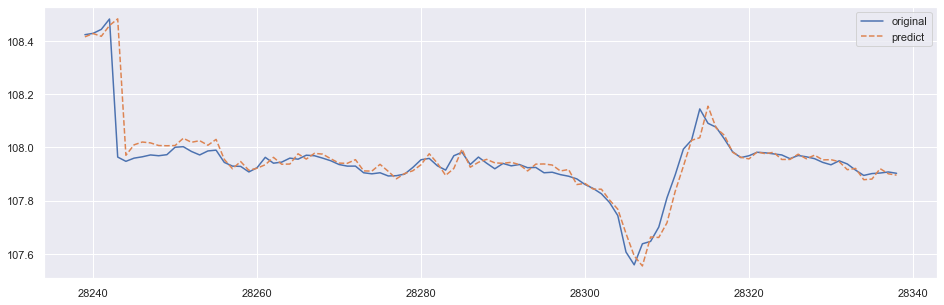

In [22]:
plt.figure(figsize=(16,5))
plt.plot(y[-100:], label='original')
plt.plot(y_[-100:], '--', label='predict')
plt.legend()

In [23]:
import pickle

filename='model.pkl'
pickle.dump(gbm, open(filename, 'wb'))

In [24]:
len(y_pred)

14120

In [25]:
predict = dataset[len(y_pred)*-1:]
predict

,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y,sma5,sma15
14219,105.414,105.434,105.410,105.414,291,24,9,2020,3,268,5,45,105.428,105.4342,105.399133
14220,105.415,105.428,105.393,105.400,232,24,9,2020,3,268,6,0,105.414,105.4340,105.401867
14221,105.400,105.414,105.395,105.412,276,24,9,2020,3,268,6,15,105.435,105.4198,105.407267
14222,105.414,105.435,105.411,105.423,162,24,9,2020,3,268,6,30,105.444,105.4158,105.410400
14223,105.423,105.444,105.423,105.438,174,24,9,2020,3,268,6,45,105.440,105.4132,105.418000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,22,30,107.895,107.9260,107.944867
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902,107.9146,107.940133
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904,107.9076,107.937000
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908,107.9028,107.932667


In [26]:
predict['predict'] = y_pred
predict

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,open,high,low,close,tickvol,day,month,year,day_of_week,day_of_year,hour,minute,y,sma5,sma15,predict
14219,105.414,105.434,105.410,105.414,291,24,9,2020,3,268,5,45,105.428,105.4342,105.399133,105.440288
14220,105.415,105.428,105.393,105.400,232,24,9,2020,3,268,6,0,105.414,105.4340,105.401867,105.442283
14221,105.400,105.414,105.395,105.412,276,24,9,2020,3,268,6,15,105.435,105.4198,105.407267,105.442689
14222,105.414,105.435,105.411,105.423,162,24,9,2020,3,268,6,30,105.444,105.4158,105.410400,105.454976
14223,105.423,105.444,105.423,105.438,174,24,9,2020,3,268,6,45,105.440,105.4132,105.418000,105.499611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,107.909,107.915,107.860,107.878,297,23,4,2021,4,113,22,30,107.895,107.9260,107.944867,107.878957
28335,107.877,107.895,107.863,107.893,272,23,4,2021,4,113,22,45,107.902,107.9146,107.940133,107.881306
28336,107.892,107.902,107.886,107.900,175,23,4,2021,4,113,23,0,107.904,107.9076,107.937000,107.920394
28337,107.903,107.904,107.885,107.887,84,23,4,2021,4,113,23,15,107.908,107.9028,107.932667,107.901193


In [27]:
predict[['y', 'close', 'predict']]

,y,close,predict
14219,105.428,105.414,105.440288
14220,105.414,105.400,105.442283
14221,105.435,105.412,105.442689
14222,105.444,105.423,105.454976
14223,105.440,105.438,105.499611
...,...,...,...
28334,107.895,107.878,107.878957
28335,107.902,107.893,107.881306
28336,107.904,107.900,107.920394
28337,107.908,107.887,107.901193


In [28]:
predict['diff_pred'] = predict['predict'] - predict['close']
predict['diff_act'] = predict['y'] - predict['close']


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
predict[['y', 'close', 'predict', 'diff_pred', 'diff_act']]

,y,close,predict,diff_pred,diff_act
14219,105.428,105.414,105.440288,0.026288,0.014
14220,105.414,105.400,105.442283,0.042283,0.014
14221,105.435,105.412,105.442689,0.030689,0.023
14222,105.444,105.423,105.454976,0.031976,0.021
14223,105.440,105.438,105.499611,0.061611,0.002
...,...,...,...,...,...
28334,107.895,107.878,107.878957,0.000957,0.017
28335,107.902,107.893,107.881306,-0.011694,0.009
28336,107.904,107.900,107.920394,0.020394,0.004
28337,107.908,107.887,107.901193,0.014193,0.021


In [30]:
predict['diff'] = predict['diff_pred'].apply(lambda x: 1 if x >= 0.02 else 0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
predict[predict['diff'] == 1]['diff_act'].sum(), predict[predict['diff'] != 1]['diff_act'].sum()

(283.5479999999995, 68.9880000000003)

In [32]:
predict[predict['diff'] == 1]['diff_act'][-100:]

28178    0.000
28179    0.003
28180    0.006
28181    0.015
28182    0.002
         ...  
28315    0.006
28317    0.007
28326    0.018
28330    0.008
28336    0.004
Name: diff_act, Length: 100, dtype: float64

In [33]:
predict[predict['diff'] == 1]['diff_pred'].sum(), predict[predict['diff'] != 1]['diff_pred'].sum()

(1142.7348004972278, -81.22226904174418)

In [34]:
data[-500:]

,date,time,open,high,low,close,tickvol,vol,spread,datetime
27840,2021.04.14,10:45:00,109.028,109.033,108.982,108.998,601,0,0,2021-04-14 10:45:00
27841,2021.04.14,11:00:00,108.998,109.023,108.961,109.000,609,0,0,2021-04-14 11:00:00
27842,2021.04.14,11:15:00,109.001,109.001,108.962,108.981,455,0,0,2021-04-14 11:15:00
27843,2021.04.14,11:30:00,108.980,108.999,108.923,108.994,542,0,0,2021-04-14 11:30:00
27844,2021.04.14,11:45:00,108.993,109.001,108.957,108.981,575,0,0,2021-04-14 11:45:00
...,...,...,...,...,...,...,...,...,...,...
28335,2021.04.23,22:45:00,107.877,107.895,107.863,107.893,272,0,0,2021-04-23 22:45:00
28336,2021.04.23,23:00:00,107.892,107.902,107.886,107.900,175,0,0,2021-04-23 23:00:00
28337,2021.04.23,23:15:00,107.903,107.904,107.885,107.887,84,0,0,2021-04-23 23:15:00
28338,2021.04.23,23:30:00,107.886,107.908,107.884,107.888,104,0,0,2021-04-23 23:30:00


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}

# XGBoost
xgb = XGBRegressor()

reg_cv = GridSearchCV(xgb, params, cv=folds, return_train_score=True)
reg_cv.fit(X, y)

In [ ]:
y_pred = xgb.predict(dtest)
y_pred

In [ ]:
y_train

In [ ]:
y_ = np.concatenate([np.array([None for i in range(len(y_train)+len(y_val))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y[-10:], label='original')
plt.plot(y_[-10:], '--', label='predict')
plt.legend()

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y[-100:], label='original')
plt.plot(y_[-100:], '--', label='predict')
plt.legend()